Pembuatan label aspek untuk confusion matrix pada k-means

In [ ]:
import pandas as pd
import json

df = pd.read_csv('dataset_berlabel/klaster_prediksi.csv')

# menentukan aspek (sebenarnya) menggunakan Skor
def tentukan_aspek(text, aspek_kompensasi, aspek_kepuasan_kerja, aspek_aktualisasi, aspek_hubungan):
    kompensasi = sum(1 for word in text.split() if word in aspek_kompensasi)
    kepuasan = sum(1 for word in text.split() if word in aspek_kepuasan_kerja)
    aktualisasi = sum(1 for word in text.split() if word in aspek_aktualisasi)
    hubungan = sum(1 for word in text.split() if word in aspek_hubungan)

    scores = {
        'Kompensasi': kompensasi,
        'Kepuasan Kerja': kepuasan,
        'Aktualisasi': aktualisasi,
        'Hubungan': hubungan
    }
    label_aspek = max(scores, key=scores.get)
    return label_aspek

def load_lexicon(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return set(json.load(file))

aspek_kompensasi = load_lexicon('leksikon/aspek_kompensasi.json')
aspek_kepuasan = load_lexicon('leksikon/aspek_kepuasan_kerja.json')
aspek_aktualisasi = load_lexicon('leksikon/aspek_aktualisasi.json')
aspek_hubungan = load_lexicon('leksikon/aspek_hubungan_kerja.json')

df['teks'] = df['teks'].fillna('').astype(str)

df[['label_klaster']] = df['teks'].apply(
    lambda x: pd.Series(tentukan_aspek(x, aspek_kompensasi, aspek_kepuasan, aspek_aktualisasi, aspek_hubungan))
)
def outputLabel(label_aspek):
    if 'Kompensasi' in label_aspek:
        return 0
    elif 'Kepuasan Kerja' in label_aspek:
        return 1
    elif 'Aktualisasi' in label_aspek:
        return 2
    elif 'Hubungan' in label_aspek:
        return 3
    else:
        return 

df['label_klaster_aktual'] = df['label_klaster'].apply(outputLabel)
df.to_csv('dataset_berlabel/klaster_aktual.csv', index=False)

In [3]:
import pandas as pd
aktual = pd.read_csv('dataset_berlabel/klaster_aktual.csv')
prediksi = pd.read_csv('dataset_berlabel/klaster_prediksi.csv')
aktual = pd.DataFrame(aktual, columns=['label_klaster_aktual'])
prediksi = pd.DataFrame(prediksi, columns=['label_klaster'])


unique_values_kolom1 = aktual['label_klaster_aktual'].unique()
print(unique_values_kolom1)
print(aktual.head())
print(len(aktual))
print("-" * 75)
unique_values_kolom2 = prediksi['label_klaster'].unique()
print(unique_values_kolom2)
print(prediksi.head())
print(len(prediksi))

[0 3 2 1]
   label_klaster_aktual
0                     0
1                     0
2                     0
3                     0
4                     3
1140
---------------------------------------------------------------------------
[0 3 2 1]
   label_klaster
0              0
1              0
2              0
3              0
4              3
1140


Confusion matrix (k-means)

Akurasi: 87.98%


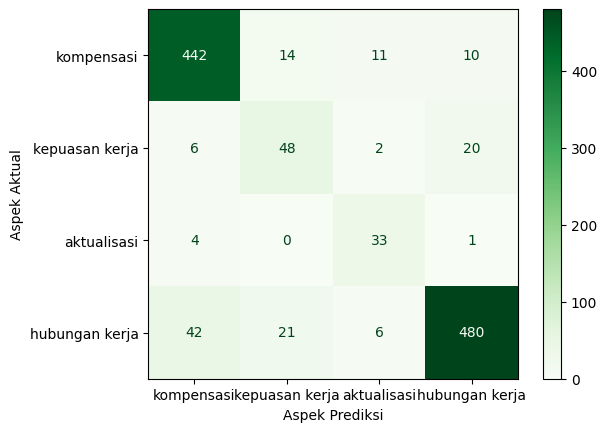

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

y_actual = aktual['label_klaster_aktual']
y_pred = prediksi['label_klaster']

conf_matrix = confusion_matrix(y_actual, y_pred)

aspek_labels = ['kompensasi', 'kepuasan kerja', 'aktualisasi', 'hubungan kerja']

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=aspek_labels)
disp.plot(cmap="Greens")

plt.xlabel('Aspek Prediksi')
plt.ylabel('Aspek Aktual')    

accuracy = accuracy_score(y_actual, y_pred)
precision = precision_score(y_actual, y_pred, average='weighted')
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')

print(f"Akurasi: {accuracy * 100:.2f}%")
plt.show()
